## HW1 - Basics of ML
Include your code in the relevant cells below.
Subparts labeled as questions (Q1.1, Q1.2, etc.) should have their answers filled in or plots placed prominently, as appropriate.

#### Important notes:

1. On this and future homeworks, depending on the data size and your hardware configuration, experiments may take too long if you use the complete dataset. This may be challenging, as you may need to run multiple experiments. So, if an experiment takes too much time, start first with a smaller sample that will allow you to run your code within a reasonable time. Once you complete all tasks, before the final submission, you can allow longer run times and run your code with the complete set. However, if this is still taking too much time or causing your computer to freeze, it will be OK to submit experiments using a sample size that is feasible for your setting (indicate it clearly in your submission). Grading of the homework will not be affected from this type of variations in the design of your experiments.


2. You can switch between 2D image data and 1D vector data using the numpy functions flatten() and resize()

In [1]:
# import general libraries
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### S1: Understanding the data
- Load MNIST FASHION dataset (hint: consider asking Bard)

Q1.1: What is the number of features in the training dataset:   ___

Q1.2: What is the number of samples in the training dataset:   ___

Q1.1: What is the number of features in the testing dataset:   ___

Q1.4: What is the number of samples in the testing dataset:   ___

Q1.3: What is the dimensionality of each data sample: ___

The Fashion MNIST dataset is a dataset of 70,000 grayscale images of 10 different types of clothing, such as t-shirts, trousers, and shoes.The dataset is divided into 60,000 training images and 10,000 test images. Each image is 28x28 pixels in size, and each pixel has a value between 0 and 255.

In [ ]:
# Get the dataset and split it into training and testing
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

As we can see here, there are in total 60000 samples in the training set and 10000 samples in the testing set. Within each sample, there are 28 x 28 = 784 features, which is also the dimensionality of each data sample.

In [3]:
print('training features: ' + str(train_images.shape))
print('training samples: ' + str(train_labels.shape))
print('testing features:  '  + str(test_images.shape))
print('testing samples:  '  + str(test_labels.shape))

training features: (60000, 28, 28)
training samples: (60000,)
testing features:  (10000, 28, 28)
testing samples:  (10000,)


In [ ]:
print('Unique labels: ' + str(np.unique(train_labels, return_counts=True)))
# prints the unique labels
# also prints the number of times each label appears

Unique labels: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


### S2: Viewing the data
- Select one random example from each category from the training set. Display the 2D image with the name of the category

Q2.1: Visualize the example image:   ___

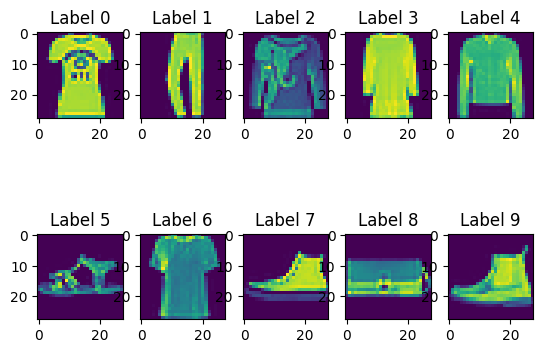

In [4]:
## Read labels
labels = np.unique(train_labels)

## Create 2x5 subplot
fig, ax = plt.subplots(nrows = 2, ncols = 5)

## Loop through the list labels and assign current label to variable tmpl
for i, tmpl in enumerate(labels):

  ## Select a random image with the current label
  indAll = np.where(train_labels == tmpl)[0]
  indSel = indAll[np.random.randint(indAll.shape)]# randomly selects one indices from the inAll array
  selImg = train_images[indSel,:,:].squeeze() # remove unnecessary dimensions from the image array

  ## Convert loop index to 2D index for the 2x5 plot
  a1, a2 = np.unravel_index(i, [2,5])

  ## Plot image
  ax[a1, a2].imshow(selImg)
  ax[a1, a2].set_title('Label ' + str(tmpl))

## Show image
plt.show()

### S3: Sub-sampling the data
- Reduce training and testing sample sizes by **randomly selecting** %10 of the initial samples

Q3.1: What is the distribution of each label in the initial train data (i.e. percentage of each label):   ___

Q3.2: What is the distribution of each label in the reduced train data:   ___

In [37]:
## Randomly sample data
def sample_data(X, Y, p):
  # X: a 2D array representing data points
  # Y: a 1D array representing labels for each data points
  # p as of random percentages


  ## Shuffle array indices
  num_sample = X.shape[0] # finds total number of data points
  ind_shuf = np.random.permutation(num_sample) # shuffle the indices

  ## Select p percent of the shuffled indices
  num_sel = int(num_sample / 100 * p ) ####### question part, we are getting 1%
  ind_sel = ind_shuf[0:num_sel]

  ## Select data
  X_out = X[ind_sel, :]
  Y_out = Y[ind_sel]

  return X_out, Y_out

In [38]:
train_images_sel, train_labels_sel = sample_data(train_images, train_labels, 1) ## why 1% here?
test_images_sel, test_labels_sel = sample_data(test_images, test_labels, 1)

In [39]:
# distribution of label in initial train data
unique, count = np.unique(train_labels, return_counts=True)

# dis of label in selected train data
unique_sel, count_sel = np.unique(train_labels_sel, return_counts=True)

In [85]:
unique_sel

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [89]:
count_sel
# total is 600

array([62, 66, 57, 58, 59, 58, 66, 61, 58, 55])

In [88]:
train_labels_sel.shape[0] # 600 selected out of 60000

600

In [22]:
p1 = (100*count / train_labels.shape[0]).reshape(1,-1) # reshape array to have one row
p2 = (100*count_sel / train_labels_sel.shape[0]).reshape(1,-1) ##### why times 100 here
## Find percentage of samples for each label
print(p1)
print(p2)

[[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]]
[[ 8.83333333  9.66666667  9.5         8.66666667 10.5        13.5
   9.83333333  9.         11.16666667  9.33333333]]


In [84]:
count / train_labels.shape[0]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

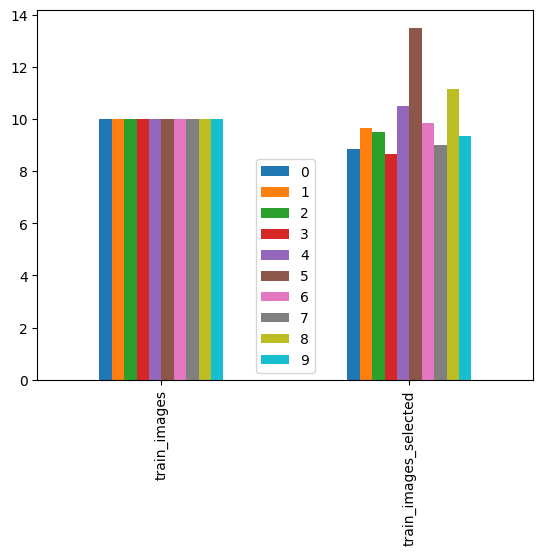

In [31]:
combined = np.concatenate((p1, p2), axis=0)
df = pd.DataFrame(data = combined, columns = labels, index = ['train_images','train_images_selected'])

df.plot.bar()
plt.show()

### S4: Sub-sampling the data (again)
- Reduce training and testing sample sizes by selecting **the first** %10 of the initial samples

Q4.1: What is the distribution of each label in the initial train data (i.e. percentage of each label):   ___

Q4.2: What is the distribution of each label in the reduced train data:   ___

Q4.3: What are your comments/interpretation on comparison of the results for S3 and S4

In [90]:
## Randomly sample data
def sample_data_again(X, Y, p, is_shuffle = False):
  ## Shuffle array indices
  num_sample = X.shape[0]

  if is_shuffle == True:
    ind_shuf = np.random.permutation(num_sample)
  else:
    ind_shuf = np.arange(0,num_sample)

  ## Select p percent of the shuffled indices
  num_sel = int(num_sample / 100 * p )
  ind_sel = ind_shuf[0:num_sel]

  ## Select data
  X_out = X[ind_sel, :]
  Y_out = Y[ind_sel]

  return X_out, Y_out

In [91]:
train_images_sel, train_labels_sel = sample_data_again(train_images, train_labels, 1)
test_images_sel, test_labels_sel = sample_data_again(test_images, test_labels, 1)

In [92]:
# distribution of label in initial train data
unique, count = np.unique(train_labels, return_counts=True)

# dis of label in selected train data
unique_sel, count_sel = np.unique(train_labels_sel, return_counts=True)

In [93]:
p3 = (100*count / train_labels.shape[0]).reshape(1,-1) # reshape array to have one row
p4 = (100*count_sel / train_labels_sel.shape[0]).reshape(1,-1)
## Find percentage of samples for each label
print(p3)
print(p4)

[[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]]
[[10.33333333 11.          9.5         9.66666667  9.83333333  9.66666667
  11.         10.16666667  9.66666667  9.16666667]]


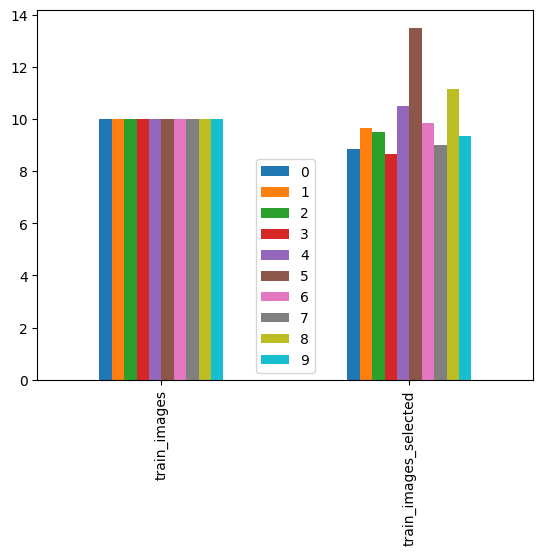

In [94]:
combined2 = np.concatenate((p3, p4), axis=0)
df = pd.DataFrame(data = combined, columns = labels, index = ['train_images','train_images_selected'])

df.plot.bar()
plt.show()

#### ! For the rest of the HW, please discard sub-sampled data from S3 and use subsampled data from S4

### S5: Exploring the dataset
- Select all **train** images in category "coat". Create and display a single pixel-wise "average image" for this category.
- Create and display a single pixel-wise "standard deviation image" for this category?
- Repeat the items above for coat images in the **test** set. Compare the average and standard deviation images.
- Repeat the items above for a different category you select.

Q5.1: Plot the 2D mean and std images for category 3 in training and testing sets:   ___

Q5.2: Plot the 2D mean and std images for the category you selected in training and testing sets:   ___

Q5.3: Comment on differences between the mean and std images from training and testing datasets? ___

In [111]:
# Select all train images in category 3
cat3_label = np.where(train_labels_sel == 3)[0]
cat3_img = train_images_sel[cat3_label, :, :]
print("Number of coat labels: " + str(cat3_label.shape))
print("Number of coat images: " + str(cat3_img.shape))
# There are 59 matching images

Number of coat labels: (58,)
Number of coat images: (58, 28, 28)


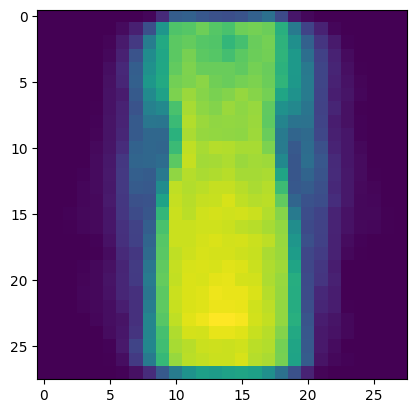

In [112]:
# Create and display a single pixel-wise "average image" for this category
img_mean = np.mean(cat3_img, axis=0) # calculate mean score across the first dimension
plt.imshow(img_mean)
plt.show()

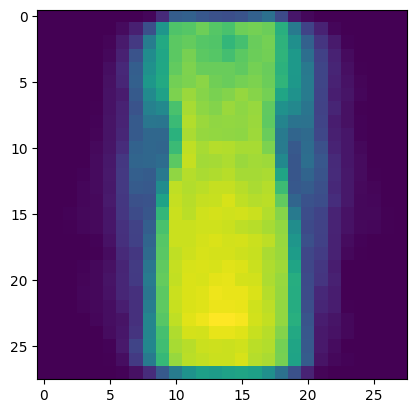

In [113]:
img_std = np.mean(cat3_img, axis=0) # calculate mean score across the first dimension
plt.imshow(img_std)
plt.show()

### S6: Image distances
- In the training set, find the image in category coat that is most dissimilar to the mean image of category coat. Show it as a 2D image
- In the training set, find the image in category coat that is most similar to mean image of category coat. Show it as a 2D image
- In the training set, find the image in category sandal that is most similar to mean image of category coat. Show it as a 2D image

**Hint:** You can use the "euclidean distance" as your similarity metric. Given that an image i is represented with a flattened feature vector v_i , and the second image j with v_m, the distance between these two images can be calculated using the vector norm of their differences ( | v_i - v_j | )

Q6.1: What is the index of most dissimilar image in category coat:   ___

Q6.2: Plot the most dissimilar coat image in 2D:   ___

Q6.3: Plot the most similar coat image in 2D:   ___

In [117]:
mean_img_vector = img_mean.flatten() # convert it to a contiguous 1D array
dist_array = np.zeros(cat3_label.shape[0])

for i, img in enumerate(cat3_label):
  img_sel = train_images_sel[img, :, :].flatten()

  distance = np.sqrt(np.dot(mean_img_vector - img_sel, mean_img_vector - img_sel))

  dist_array[i] = distance

In [121]:
# most similar image in category 3
img_similar = cat3_label[dist_array.argmin()]
# most disimilar image in category 3
img_dissimilar = cat3_label[dist_array.argmax()]

print("Most similar image index: " + str(img_similar))
print("Most dissimilar image index: " + str(img_dissimilar))

Most similar image index: 455
Most dissimilar image index: 318


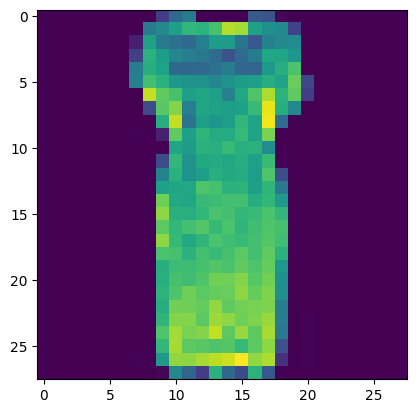

In [123]:
# similar image
plt.imshow(train_images_sel[img_similar,:,:])
plt.show()

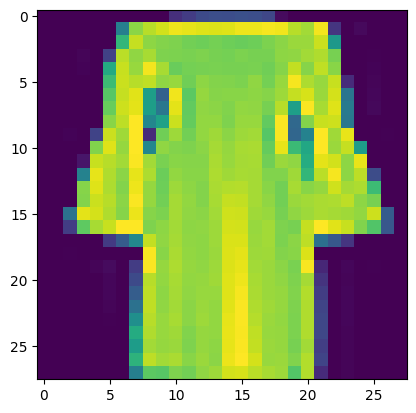

In [126]:
# similar image
plt.imshow(train_images_sel[img_dissimilar,:,:])
plt.show()

### S7: Image distances, part 2
- Repeat questions S3 and S4 after binarizing the images first

Q7.1: What is the index of most dis-similar coat image:   ___

Q7.2: What is the index of most similar coat image:   ___

Q7.3: Did the answer change after binarization? How do you interprete this finding?:   ___

In [130]:
# binarize image
binary_train_images = (train_images_sel > 128).astype(int) ##  why binarize it?

cat3_label = np.where(train_labels_sel == 3)[0]
cat3_img = binary_train_images[cat3_label, :, :]
print("Number of coat labels: " + str(cat3_label.shape))
print("Number of coat images: " + str(cat3_img.shape))

Number of coat labels: (58,)
Number of coat images: (58, 28, 28)


In [131]:
img_mean = np.mean(cat3_img, axis=0)
mean_img_vector = img_mean.flatten() # convert it to a contiguous 1D array
dist_array = np.zeros(cat3_label.shape[0])

for i, img in enumerate(cat3_label):
  img_sel = binary_train_images[img, :, :].flatten()
  distance = np.sqrt(np.dot(mean_img_vector - img_sel, mean_img_vector - img_sel))
  dist_array[i] = distance

img_similar = cat3_label[dist_array.argmin()]
img_dissimilar = cat3_label[dist_array.argmax()]

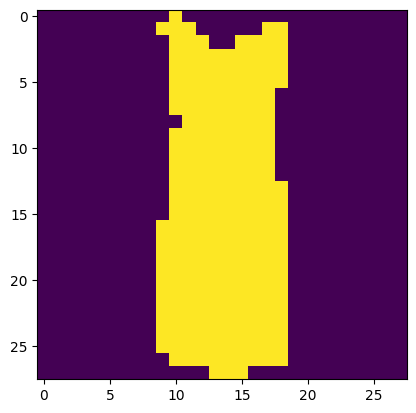

In [132]:
plt.imshow(binary_train_images[img_similar,:,:])
plt.show()

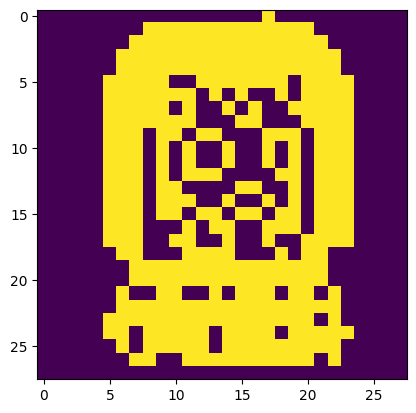

In [133]:
plt.imshow(binary_train_images[img_dissimilar,:,:])
plt.show()

### S8: Binary classification between category coat and sandal  (split train data)
- Select images from these two categories in the training dataset
- Split them into two sets (Set1, Set2) with a %60 and %40 random split
- Replace category labels as 0 (for coat) and 1 (for sandal)
- Use Set1 to train a linear SVM classifier with default parameters and predict the class labels for Set2
- Use Set2 to train a linear SVM classifier with default parameters and predict the class labels for Set1

Q8.1: What is the prediction accuracy using the model trained on Set1:   ___

Q8.2: What is the prediction accuracy using the model trained on Set2:   ___

In [142]:
from sklearn.model_selection import train_test_split

# select images from these coat and sandal in the training dataset
coat_sandal = np.where((train_labels_sel == 4) | (train_labels_sel == 5))[0] # the index
cs_img = train_images_sel[coat_sandal, :, :]
cs_label = train_labels_sel[coat_sandal] # the actual label

In [148]:
# replace category labels
cs_label[cs_label == 4] = 0 ## why turn it into binary here?
cs_label[cs_label == 5] = 1

cs_img = cs_img.reshape(cs_img.shape[0], -1) #
# what's the purpose of reshaping before feeding it into ML model?
cs_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [149]:
# random split
cs_img_train, cs_img_test, cs_label_train, cs_label_test = train_test_split(cs_img, cs_label, test_size=0.4, random_state=42)

In [153]:
# Use Set1 to train a linear SVM classifier with default parameters and predict the class labels for Set2
# What does it mean to predict the class label?

from sklearn import svm ## what is a linear SVM classifier
from sklearn import metrics

cs_img_test = cs_img_test.reshape(cs_img_test.shape[0], -1)

# Create the svm classifier
clf = svm.SVC(kernel='linear')

# Train the model
clf.fit(cs_img_train, cs_label_train)

# Predict the label
cs_label_pred = clf.predict(cs_img_test)

# Accuracy
print('Accuracy: ', metrics.accuracy_score(cs_label_test, cs_label_pred))

Accuracy:  0.9574468085106383


In [154]:
# Use Set2 to train a linear SVM classifier with default parameters and predict the class labels for Set1
clf.fit(cs_img_test, cs_label_test)

# Predict the label
cs_label_pred = clf.predict(cs_img_train)

print('Accuracy: ', metrics.accuracy_score(cs_label_train, cs_label_pred))

## why does the accuracy score increases?

Accuracy:  0.9857142857142858


### S9: k-NN Error Analysis
- In training and testing datasets select the images in categories: 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt'
- Train k-NN classifiers using 4 to 40 nearest neighbors with a step size of 4
- Calculate and plot overall testing accuracy for each experiment

Q10.1: For k=4 what is the label that was predicted with lowest accuracy:   ___

Q10.2: For k=20 what is the label that was predicted with lowest accuracy:   ___

Q10.3: What is the label pair that was confused most often (i.e. class A is labeled as B, and vice versa):   ___

Q10.4: Visualize 5 mislabeled samples with their actual and predicted labels

In [156]:
outfit_index = np.where(np.isin(train_labels_sel,[1, 3, 5, 7, 9]) == True)[0]
outfit_img = train_images_sel[outfit_index, :, :]
outfit_label = train_labels_sel[outfit_index]

## Flatten images
outfit_img = outfit_img.reshape(outfit_img.shape[0], -1)

## Create train test data
outfit_img_train, outfit_img_test, outfit_label_train, outfit_label_test = train_test_split(outfit_img, outfit_label, test_size=0.4, random_state=42)

The basic idea behind k-NN is to find the k most similar training examples to a new, unknown example and then use the labels of those training examples to predict the label of the unknown example. We are training 10 different k-NN classifiers, with the number of nearest neighbors ranging from 4 to 40 in increments of 4. The concept behind this is to find the optimal number of nearest neighbors for the k-NN classifier.

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

arr_k = np.arange(4, 40, 4)
mat_pred = np.zeros([arr_k.shape[0], outfit_label_test.shape[0]])     ## Matrix to keep predictions from each experiment
acc_pred = np.zeros([arr_k.shape[0], 1])     ## Array to keep accuracy from each experiment
for i, k in enumerate(arr_k):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(outfit_img_train, outfit_label_train)
  y_pred = classifier.predict(outfit_img_test)
  mat_pred [i, :] = y_pred
  acc_pred[i] = metrics.accuracy_score(outfit_label_test, y_pred)

In [159]:
print(acc_pred)

[[0.875     ]
 [0.86666667]
 [0.86666667]
 [0.85833333]
 [0.85833333]
 [0.825     ]
 [0.81666667]
 [0.8       ]
 [0.775     ]]


In [163]:
result = confusion_matrix(outfit_label_test, mat_pred[0])
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[26  0  0  0  0]
 [ 1 23  0  0  0]
 [ 0  1 19  2  5]
 [ 0  0  1 18  1]
 [ 0  0  0  4 19]]


### Bonus:

- We describe each image by using a reduced set of features (compared to n=784 initial features for each pixel value) as follows:
  
  1. Binarize the image (background=0, foreground=1)

  2. For each image row i, find n_i, the sum of 1's in the row (28 features)
  
  3. For each image column j, find n_j, the sum of 1's in the column (28 features)
  
  4. Concatenate these features into a feature vector of 56 features
  
Repeat classification experiments in S9 using this reduced feature set.

Q11.1: What is the prediction accuracy using the model trained using the train data:   ___

Q11.2: What is the prediction accuracy using the model trained using the test data:   ___
